In [1]:
%reload_ext kedro.ipython

[02/14/25 20:57:26] INFO     Using                                                                  ]8;id=158468;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=603302;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/framework/project/__init__.py#270\270]8;;\
                             '/home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/sit                
                             e-packages/kedro/framework/project/rich_logging.yml' as logging                       
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=700677;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=397842;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=92883;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=314299;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=32582;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=146500;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/guilherme/Projects/credit-risk-analysis.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/14/25 20:57:26] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=873155;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=407282;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[02/14/25 20:57:27] INFO     Kedro project Credit Risk Analysis                                     ]8;id=618197;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=147424;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=929204;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=731589;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[02/14/25 20:57:28] INFO     Registered line magic 'run_viz'                                        ]8;id=499142;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=457242;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#153\153]8;;\

# Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Funções úteis

In [13]:
def verify(df):
    print(df.shape)
    display(df.head())
    display(df.tail())

def display_info_dataframe(df):
    df_info = pd.concat([df.dtypes, df.isna().sum(), df.nunique()], axis=1)
    df_info.columns = ['dtype', 'qtd_nulos', 'qtd_unicos']
    display(df_info)

def separa_colunas(df):
    numbers = df.select_dtypes(include=["number"]).columns.tolist()
    texts = df.select_dtypes(exclude=["number"]).columns.tolist()
    return numbers, texts

# Lendo as bases

In [4]:
df_completo = catalog.load("raw_data")

                    INFO     Loading data from raw_data (CSVDataset)...                         ]8;id=558031;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=999153;file:///home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#390\390]8;;\

                    WARNING  /home/guilherme/Projects/credit-risk-analysis/venv/lib/python3.10/site ]8;id=36519;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=89135;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             -packages/kedro_datasets/pandas/csv_dataset.py:172: DtypeWarning:                     
                             Columns (13) have mixed types. Specify dtype option on import or set                  
                             low_memory=False.                                                                     
                               return pd.read_csv(load_path, **self._load_args)                                    
                                                                                                                   

In [5]:
verify(df_completo)

(77414, 16)


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13,280343.0,161.0
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25,235315.0,87.0
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67,100006.0,126.0
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,2021-05-13,(1,NaN,Serviços,YAHOO,MEDIO,14,NaN,NaN
77413,8343941262792249232,2021-06,2021-06-30,2021-08-16,2021-08-16,20736.51,4.99,2019-05-28,11,NaN,Indústria,HOTMAIL,GRANDE,31,97599.0,116.0


In [6]:
display_info_dataframe(df_completo)

,dtype,qtd_nulos,qtd_unicos
ID_CLIENTE,int64,0,1248
SAFRA_REF,object,0,35
DATA_EMISSAO_DOCUMENTO,object,0,1040
DATA_PAGAMENTO,object,0,921
DATA_VENCIMENTO,object,0,955
VALOR_A_PAGAR,float64,0,68527
TAXA,float64,0,5
DATA_CADASTRO,object,0,732
DDD,object,7414,78
FLAG_PF,object,77195,1


# EDA (univariada)

## Duplicidade

In [7]:
df_completo.loc[df_completo.duplicated(subset=['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO','DATA_VENCIMENTO', 'VALOR_A_PAGAR'])]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
743,465309249432033993,2018-08,2018-08-20,2018-09-13,2018-09-14,20122.88,6.99,2014-07-23,69,NaN,Comércio,GMAIL,GRANDE,76,NaN,NaN
1105,5888474320320735000,2018-08,2018-08-22,2018-10-16,2018-10-08,82515.00,5.99,2014-12-22,95,NaN,Indústria,GMAIL,GRANDE,65,NaN,NaN
2523,8350724667410677464,2018-09,2018-09-17,2018-10-05,2018-10-08,21469.21,4.99,2011-05-30,85,NaN,Serviços,YAHOO,GRANDE,61,378706.0,112.0
2978,1276604410881911401,2018-10,2018-10-15,2018-11-14,2018-11-28,151974.24,8.99,2000-08-15,67,NaN,Indústria,YAHOO,PEQUENO,38,230386.0,83.0
4892,3977861004707764824,2018-11,2018-11-11,2018-12-27,2018-11-27,11132.06,5.99,2011-02-14,44,NaN,Serviços,GMAIL,GRANDE,87,339356.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73972,5888474320320735000,2021-05,2021-05-17,2021-07-06,2021-07-01,54333.00,6.99,2014-12-22,95,NaN,Indústria,GMAIL,GRANDE,65,212188.0,102.0
73978,5888474320320735000,2021-05,2021-05-26,2021-07-20,2021-07-12,54333.00,6.99,2014-12-22,95,NaN,Indústria,GMAIL,GRANDE,65,212188.0,102.0
74536,8529899700094903171,2021-06,2021-06-02,2021-06-23,2021-06-24,62025.00,5.99,2000-08-15,32,NaN,Comércio,GMAIL,GRANDE,36,872235.0,129.0
74539,8529899700094903171,2021-06,2021-06-06,2021-06-25,2021-06-28,61866.50,5.99,2000-08-15,32,NaN,Comércio,GMAIL,GRANDE,36,872235.0,129.0


- Como não temos um ID de cada documento para a base de pagamentos, podemos considerar cada entrada única, independente se os valores são iguais em todas as colunas.

## Preenchimento

<Axes: >

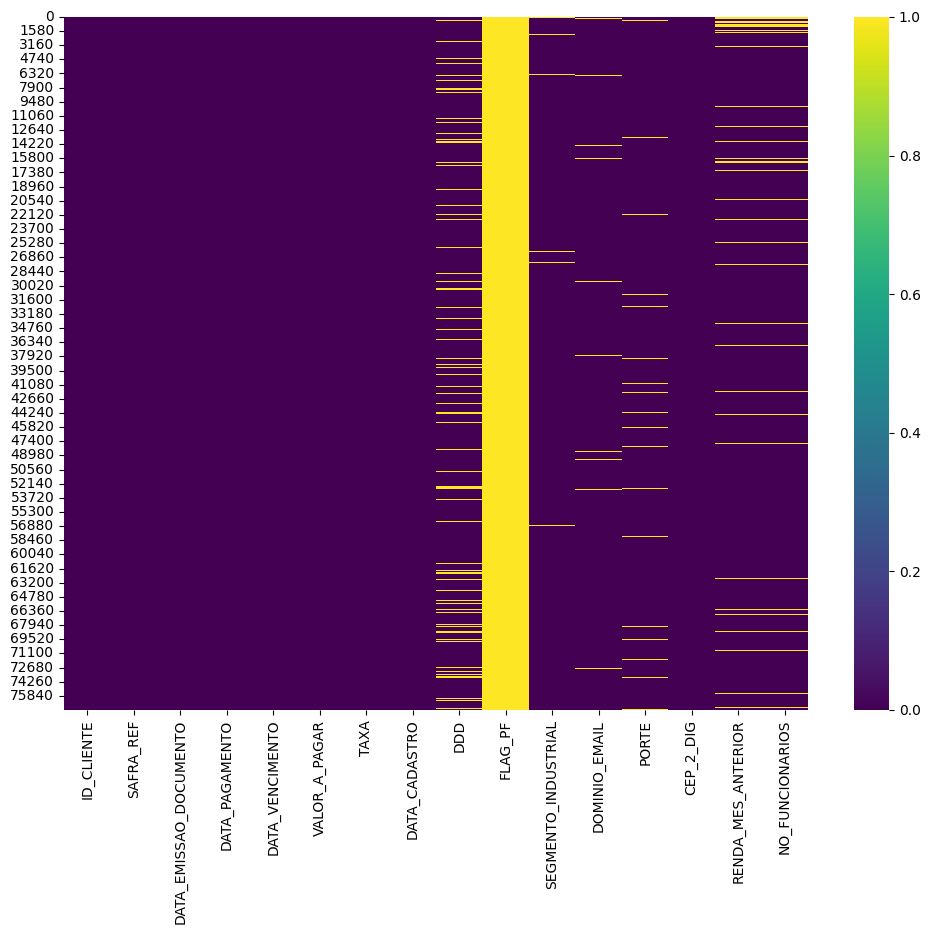

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(df_completo.isna(),cmap = 'viridis')

In [9]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           77414 non-null  float64
 6   TAXA                    77414 non-null  float64
 7   DATA_CADASTRO           77414 non-null  object 
 8   DDD                     70000 non-null  object 
 9   FLAG_PF                 219 non-null    object 
 10  SEGMENTO_INDUSTRIAL     75997 non-null  object 
 11  DOMINIO_EMAIL           76516 non-null  object 
 12  PORTE                   74938 non-null  object 
 13  CEP_2_DIG               77414 non-null  object 
 14  RENDA_MES_ANTERIOR      73477 non-null

## FLAG_PF

In [10]:
df_completo['FLAG_PF'].value_counts(dropna=False)


FLAG_PF
NaN    77195
X        219
Name: count, dtype: int64

In [11]:
df_completo = df_completo[df_completo['FLAG_PF'].isna()].reset_index(drop=True).copy()

- Clientes PF e PJ não devem ser modelados juntos. Como a volumetria dos clientes PF é muito baixa, será criado um modelo apenas para os clientes PJ.

In [12]:
verify(df_completo)

(77195, 16)


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65,NaN,NaN


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
77190,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13,280343.0,161.0
77191,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25,235315.0,87.0
77192,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67,100006.0,126.0
77193,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,2021-05-13,(1,NaN,Serviços,YAHOO,MEDIO,14,NaN,NaN
77194,8343941262792249232,2021-06,2021-06-30,2021-08-16,2021-08-16,20736.51,4.99,2019-05-28,11,NaN,Indústria,HOTMAIL,GRANDE,31,97599.0,116.0


## Volumetrias e distribuições

In [14]:
num, tex = separa_colunas(df_completo)

In [19]:
print("Colunas numéricas:", num)
print("Colunas de texto:", tex)

Colunas numéricas: ['ID_CLIENTE', 'VALOR_A_PAGAR', 'TAXA', 'RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']
Colunas de texto: ['SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO', 'DATA_CADASTRO', 'DDD', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG']


In [20]:
# Conjunto de colunas numéricas a serem analisadas
useful_num = ['VALOR_A_PAGAR', 'TAXA', 'RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']

# Conjunto de colunas de texto a serem analisadas
useful_tex = ['SAFRA_REF', 'DDD', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG']

### Colunas de texto

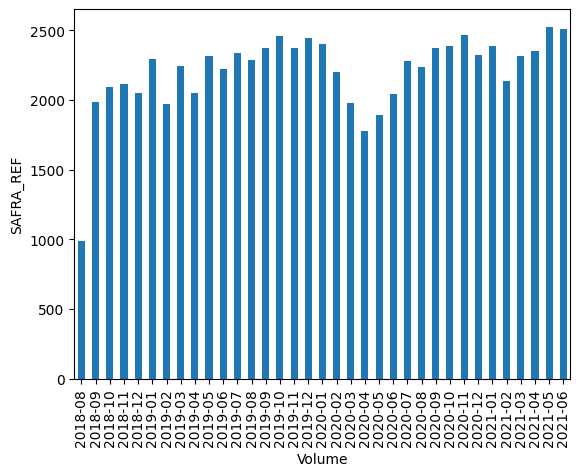

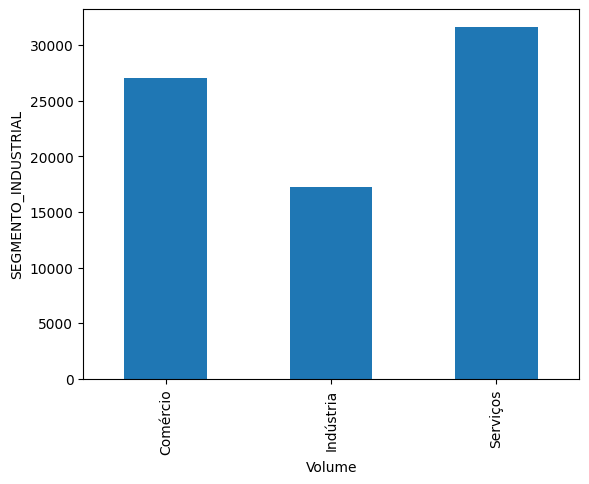

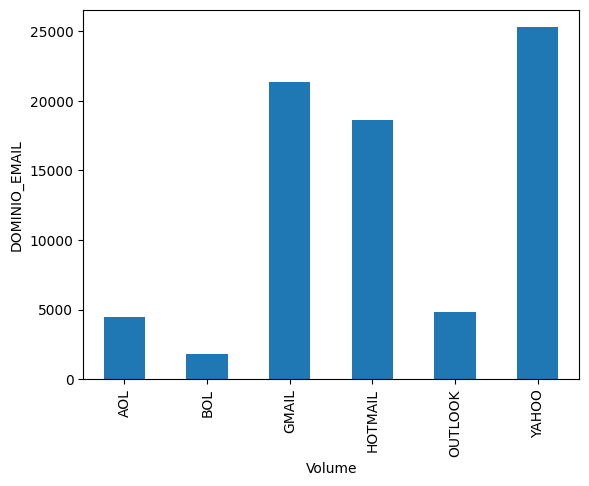

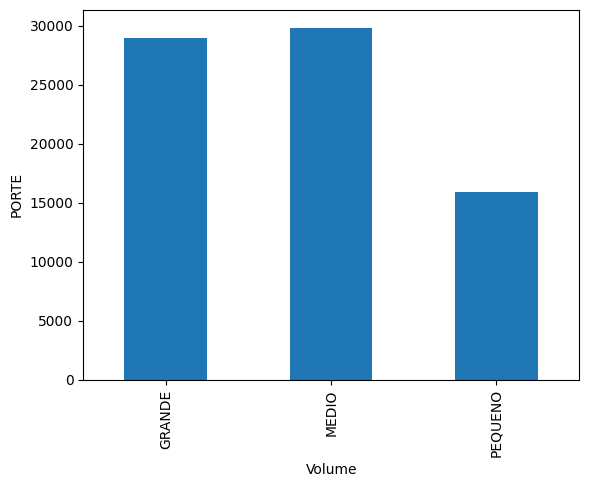

In [21]:
for col in useful_tex:
  if df_completo[col].nunique() < 50:
    df_completo[col].value_counts().sort_index().plot.bar()
    plt.xlabel('Volume')
    plt.ylabel(col)
    plt.show()

In [22]:
for col in useful_tex:
  if df_completo[col].nunique() > 50:
    print(col)

DDD
CEP_2_DIG


In [23]:
df_completo['DDD'].unique()


array(['99', '31', '75', '49', '88', '18', '67', '21', '11', '44', nan,
       '19', '14', '16', '85', '41', '51', '12', '62', '43', '91', '42',
       '61', '33', '48', '71', '65', '38', '24', '(3', '47', '28', '(2',
       '81', '35', '13', '86', '94', '45', '17', '55', '64', '69', '32',
       '(6', '27', '66', '63', '46', '(1', '54', '77', '34', '74', '37',
       '53', '56', '95', '22', '73', '(9', '(4', '52', '87', '98', '(8',
       '92', '82', '79', '93', '83', '00', '(5', '15', '02', '84', '(0',
       '04', '07'], dtype=object)

In [24]:
df_completo['CEP_2_DIG'].unique()


array([65, 77, 48, 89, 62, 19, 38, 26, 55, 87, 37, 22, 13, 18, 21, 98, 14,
       60, 82, 92, 79, 12, 27, 76, 67, 72, 68, 11, 84, 70, 83, 88, 75, 36,
       45, 44, 16, 42, 78, 31, 41, 35, 51, 30, 86, 25, 29, 17, 23, 20, 93,
       64, 95, 85, 15, 99, 80, 24, 61, 90, 50, 96, 97, 57, 46, 47, 32, 54,
       91, 56, 28, 71, 33, 94, 58, 34, 59, 69, 74, 40, 49, 43, 66, 39, 73,
       81, 53, 52, 63, '19', '80', '29', '43', '64', '34', '36', '31',
       '58', '13', '86', '15', '28', '95', '89', '88', '21', '65', '87',
       '69', '78', '33', '61', '83', '17', '47', '75', '45', '16', '85',
       '14', '46', '37', '11', '38', '98', '91', '76', '68', '54', '93',
       '99', '18', '30', '39', '62', '49', '26', '41', '90', '24', '59',
       '72', '12', '27', '23', '20', '96', '56', '22', '55', '35', '42',
       '32', '84', '70', '73', '25', '97', '48', '79', '44', '74', '81',
       '77', '53', '82', '60', '92', '51', '57', '71', '67', '40', 'na',
       '66', '94', '50', '63', '52'], dtyp

### Colunas numéricas


VALOR_A_PAGAR            Axes(0.125,0.11;0.168478x0.77)
TAXA                  Axes(0.327174,0.11;0.168478x0.77)
RENDA_MES_ANTERIOR    Axes(0.529348,0.11;0.168478x0.77)
NO_FUNCIONARIOS       Axes(0.731522,0.11;0.168478x0.77)
dtype: object

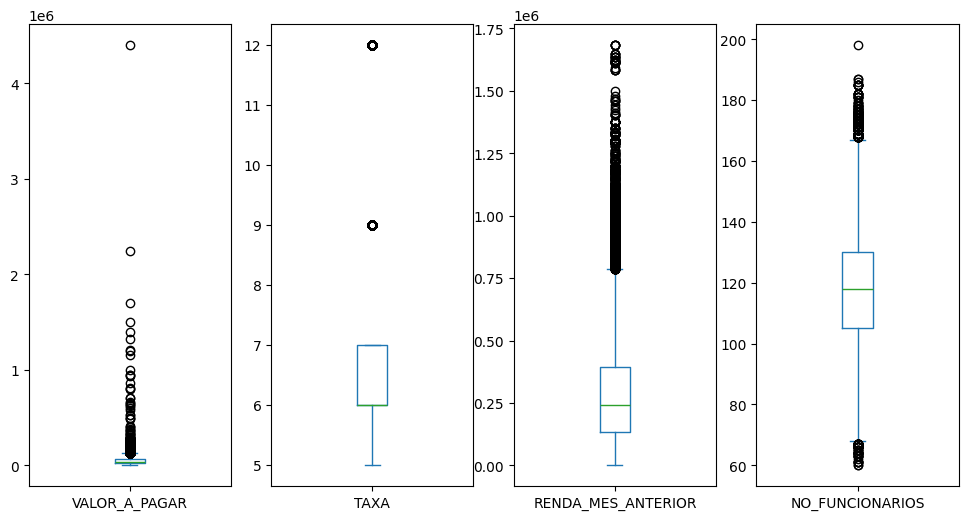

In [25]:
df_completo[useful_num].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(12, 6)
)